# Simple Linear Regression

## Introduction
A linear comparison of only two quantitative variables.

Examples:
- Price vs. Sales
- Temperature vs Humidity
- Height vs. Weight
- Hours Studying vs. Test Grades 

The variable on the **y-axis** is called the `response` or `dependent variable` while the variable on the **x-axis** is called the `explanatory` or `independent variable`.

The response variable (y) is the one we are trying to predict, while the explanatory variable (x) is used to predict the response. In the price vs. sales example, price would be the explanatory variable (given we have more control over it) and sales would be the response variable. 

## Scatter Plots
The most common way to visualize these relationships is with a scatter plot. They are useful to visualize both the strength (noticing how close the points are to one another) and the direction of the relationship between two variables. 

Strength is often classified as:
- Strong
- Moderate
- Week

Direction can be either:
- Positive
- Negative

A common way to measure the correlation between two variables is using the [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). It is often noted by a lowercase $r$. It is always between -1 to 1. 

## Correlation Coefficients

Correlation coefficients provide a measure of the strength and direction of a linear relationship.

A rule of thumb for judging the strength:

- Strong: $0.7 \leq |r| \leq 1.0$
- Moderate: $0.3 \leq |r| < 0.7$
- Weak: $0.0 \leq |r| < 0.3$ 

The excel formula for the correlation coefficient is `CORREL(col1, col2)`.

## What Defines a Line?
A line is commonly identified by an intercept and a slope.

The intercept is defined as the predicted value of the response when the x-variable is zero.

The slope is defined as the predicted change in the response for every one unit increase in the x-variable.

We notate the line in linear regression in the following way:

$$\hat{y} = b_{0} + b_{1}x_{1}$$

where

- $\hat{y}$ is the predicted value of the response from the line.
- $b_0$ is the intercept.
- $b_1$ is the slope.
- $x_1$ is the explanatory variable.

Note that in the equation above, there is a hat in the $\hat{y}$ term. This hat indicates that the value is the predicted value from the fitted line and it is not the real value. We use $y$ (without the hat) to denote the actual response value for a data point in our dataset.

## Fitting a Regression Line
The main algorithm used to find the best fit line is called the **least-squares** algorithm, which finds the line that minimizes is $\sum\limits_{i=1}^n(y_i - \hat{y_i})^2$

There are other ways we might choose a "best" line, but this algorithm tends to do a good job in many scenarios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('support-files/14_Regression/house_price_area_only.csv')
df.head()

,price,area
0,598291,1188
1,1744259,3512
2,571669,1134
3,493675,1940
4,1101539,2208


[Statsmodel's](https://www.statsmodels.org/stable/index.html) official documentation.

[Here](https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model) is a post on the need of an intercept in nearly all cases of regression. Again, there are very few cases where you do not need to include an intercept in a linear model.

In [2]:
# we almost always have to add an intercept when using linear regression
df['intercept'] = 1

# first, we provide our Y, then a list of our X variables
lm = sm.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:00:32   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## How to Interpret the Results?
For now, look at the second table, which tells us about the model we fit.

We can build a linear model in this way:

$$\hat{y}: b_0 + b_1x $$

The predicted house price $\bar{y}$ is equal to:

$$\hat{y} = 9588 + 348x$$

For every unit increase in the area, we would predict that the price would increase by 348.

Remember, all data in a single column must have the same unit for the analysis to be effective. 

In P > |t|, we also have the p-values, like this:

For the intercept: 

$$H_0: \beta_{0} = 0$$
$$H_1: \beta_{0} \neq 0$$

For the slope:

$$H_0: \beta_{1} = 0$$
$$H_1: \beta_{1} \neq 0$$

Python, and other software, by default compute the p-values using a not equal to ($\neq$). These p-values can give a quick glimpse as to whether or not a particular variable is using for predicting the response. 

In this example, the p-value on the intercept (0.209) isn't as useful as the one on the slope (0.000), which suggests that the area is statistically significant for predicting price. 

## Does the Line fit the Data Well?

The **R-squared** value is the square of the correlation coefficient.

A common definition for the R-squared variable is that it is the *amount of variability in the response variable that can be explained by the x-variable in our model*. In general, the closer this value is to 1, the better our model fits the data.

In this example, the results suggest that 67.8% of the variability in prices are explained by the area. The remaining 32.2% are explained by other variables that are not in the model. 

In general, the closer the R-squared is to 1, the better our line fits through the data. 

## Quiz
### 1. Carats vs. Price

In [3]:
df_diamonds = pd.read_csv('support-files/14_Regression/carats.csv', header=None)
df_diamonds.columns = ['carats', 'price']
df_diamonds.head()

,carats,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


`1.` Similar to the last notebook, fit a simple linear regression model to predict price based on the weight of a diamond.

In [4]:
df_diamonds['intercept'] = 1

lm_dia = sm.OLS(df_diamonds['price'], df_diamonds[['carats', 'intercept']])
results_dia = lm_dia.fit()
results_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           6.75e-40
Time:                        18:00:33   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carats      3721.0249     81.786     45.497      0.000    3556.398    3885.651
intercept   -259.6259     17.319    -14.991      0.000    -294.487    -224.765
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
df_diamonds.shape

(48, 3)

`2.` Use [scatter](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html) to create a scatterplot of the relationship between price and weight.

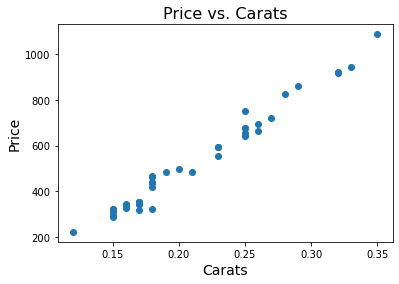

In [6]:
plt.scatter(df_diamonds['carats'], df_diamonds['price'])
plt.xlabel("Carats", size=14)
plt.ylabel("Price", size=14)
plt.title("Price vs. Carats", size=16);

In [7]:
rsquared = 0.978
r = np.sqrt(0.978)
r

0.9889388252060892

### 2. Homes v. Crime

The Boston housing data is a built in dataset in the sklearn library of python.  You will be using two of the variables from this dataset, which are stored in **df**. The median home price in thousands of dollars and the crime per capita in the area of the home are shown above.

`1.` Use [this dataframe](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) to fit a linear model to predict the home price based on the crime rate. Don't forget an intercept.

In [8]:
from sklearn.datasets import load_boston
import warnings

# this dataset has an ethical problem and will be removed in the version 1.2 of scikit learn
warnings.simplefilter(action='ignore', category=FutureWarning)

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


In [9]:
df['intercept'] = 1

lm = sm.OLS(df['MedianHomePrice'], df[['CrimePerCapita', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.17e-19
Time:                        18:00:34   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
CrimePerCapita    -0.4152      0.044     -9.460      0.000      -0.501      -0.329
intercept         24.0331      0.409     58.740      0.000      23.229      24.837
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.`Plot the relationship between the crime rate and median home price below.  Use your plot and the results from the first question as necessary to answer the remaining quiz questions below.

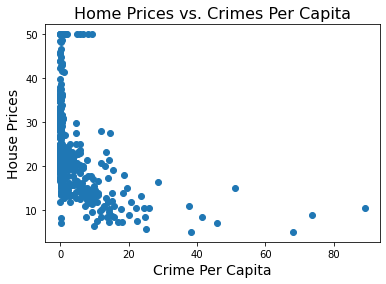

In [10]:
plt.scatter(df['CrimePerCapita'], df['MedianHomePrice'])
plt.xlabel('Crime Per Capita', size=14)
plt.ylabel('House Prices', size=14)
plt.title('Home Prices vs. Crimes Per Capita', size=16);

In [11]:
rsquared = 0.151
r = -np.sqrt(rsquared)
r

-0.38858718455450897

- For every 100% increase in crime per capita, the expected decrease in the median home price (remember home prices are in thousands of dollars) is 412.80 dollars.
- If there was no crime, we would expect the median home price to be $24,016 (remember home prices are in thousands of dollars).
- 15.1% of the variability in price can be explained by the crime per capita.
- The p-value of 0.000 associated with rime per capita suggests that it is statistically significant in providing information in predicint median home values. 

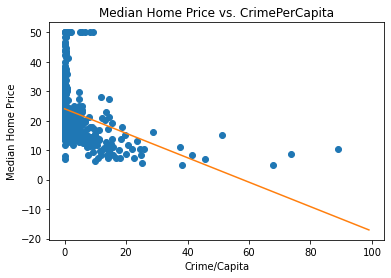

In [12]:
# advanced: udacity instructor showing the line that was fit:

# To show the line that was fit I used the following code from 
# https://plot.ly/matplotlib/linear-fits/

import chart_studio.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats


xi = arange(0,100)
A = array([ xi, ones(100)])

# (Almost) linear sequence
y = df['MedianHomePrice']
x = df['CrimePerCapita']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*xi+intercept

plt.plot(x,y,'o', xi, line);
plt.xlabel('Crime/Capita');
plt.ylabel('Median Home Price');
pylab.title('Median Home Price vs. CrimePerCapita');

## Recap:

1. Simple linear regression is about building a line that models the relationship between two quantitative variables.
2. Correlation coefficients are a measure that can inform us about the **strength** and **direction** of a linear relationship.
3. The most common way to visualize simple linear regression is using a scatterplot.
4. A line is defined by an intercept and slope, which can be found using the **statsmodels** library in Python.
5. The lesson also touched on interpretations for the slope, intercept, and R-squared values.